# Manas Dhanuka; Homework 5

## Problem 1

In [1]:
import random
import statistics as st
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def sample_gen(num_of_samples, P_infection):
    '''This function generates a sample of given size, depensding upon the value given for sample size 
    and probability of infection. The 1 signifies not infected and 0 signifies infected'''
    sample = []


    for i in range(num_of_samples):

        rand_num = random.random()

        if rand_num <=  P_infection:
            sample.append(0)
        else:
            sample.append(1)
    return sample

In [3]:
def permutation_test(treatment, control, num_of_permutations):
    '''This function takes in two list one control and one treatment group does the difference of means calculation 
    for the permutation test for the treatment and control sample groups. It returns a list of differnce of means 
    generated to use in the permutation test.'''
    
    
    mix = treatment + control #cointaining treatment and control
    list_diff_means=[] # list containing difference of means for the number of permutatiins we run.

    for i in range(num_of_permutations): # loop to run permutations
        random.shuffle(mix) #shuffling the list 
        test_control = mix[:(len(mix)//2)] #storing first half as control
        test_treatment = mix [(len(mix)//2):] #second as treatment 
        diff_mean = ((st.mean(test_treatment)))- ((st.mean(test_control))) #calculating difference between those lists created above
        list_diff_means.append(diff_mean) #appending in a list

        
    return list_diff_means


In [4]:
def p_value_calculator(treatment, control, list_of_diff_means):
    '''This fucntion takes in the treatment and control group, calcutes the test statistic
    (differnece of means of the response values) and the p-value from a list of difference of means 
    obtained from the result of the permutation test function'''

    treatment_mean = st.mean(treatment)
    control_mean = st.mean(control)
    test_stat = treatment_mean - control_mean #the test statitic to compare aginst later 

    #p-value calculation
    significant_means = []

    for diff_mean in list_of_diff_means:
        if diff_mean >= test_stat:
                significant_means.append(diff_mean)
    
    p_value = len(significant_means)/len(list_of_diff_means)

    return p_value

In [5]:
def test_of_significance(p_value, alpha):

    '''This function takes in the p-value and decides depending upon the alpha value if to reject the null hypothesis,
    or accept the null hypothesis. Rejecting the null hypothesis is denoted by 1 and failing to reject the null 
    hypotheis as 0.'''

    if p_value <= alpha:
        return 1
    else:
        return 0
    

In [6]:
def permutation_test_simulator(num_of_runs, num_of_samples, P_infection_control, P_infection_treatment):
    '''Runs permutation test a specified number of permutations (num_of_runs) times for a given sample size 
    (num_of_samples and returns a list that has 0s and 1s. Where 1 means rejecting the null hypothesis and 0 
    means failing to reject the null hypotheis. '''
    
    list_of_results=[]
    
    for run_num in range(1,num_of_runs): #runnin p test multiple times for above set N or number of samples

        treatment = sample_gen(num_of_samples,P_infection_treatment)
        control = sample_gen(num_of_samples,P_infection_control)
        permutation_test_diff_means = permutation_test(treatment, control, num_of_permutations = 1000)
        p_val = p_value_calculator(treatment,control,permutation_test_diff_means)

        list_of_results.append(test_of_significance(p_val,0.05))

    return list_of_results  

In [7]:
def N_for_gt_thresh(N):
    '''Runs the permuatation test a given number of times for 1 to N number of samples in the control and treatent 
    and returns a list with the percentage of significant results for every N value.'''
    
    thresh_value =[]
    for n in range(1,N):
        p_list = permutation_test_simulator(200,n,P_infection_control=0.5,P_infection_treatment=0.1)

        thresh_value.append((p_list.count(1)/len(p_list)))

    return thresh_value


In [8]:
result = N_for_gt_thresh(50) #Function call

In [11]:
N_values = [] #List to store N values to plot later 

for n in range(1,len(result)+1):
    N_values.append(n)

N_min = [] #list to store minimum value of N (number of pigs) when 90% results are significant
for val in result:
    if val > 0.9:
        N_min.append(result.index(val)+1) 

<ipython-input-15-ef4be0d54735>:18: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.axhline(threshold, color='#c84b6b', lineStyle='--')
<ipython-input-15-ef4be0d54735>:19: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.axvline(N_min[0], color='#c84b6b', lineStyle='--')


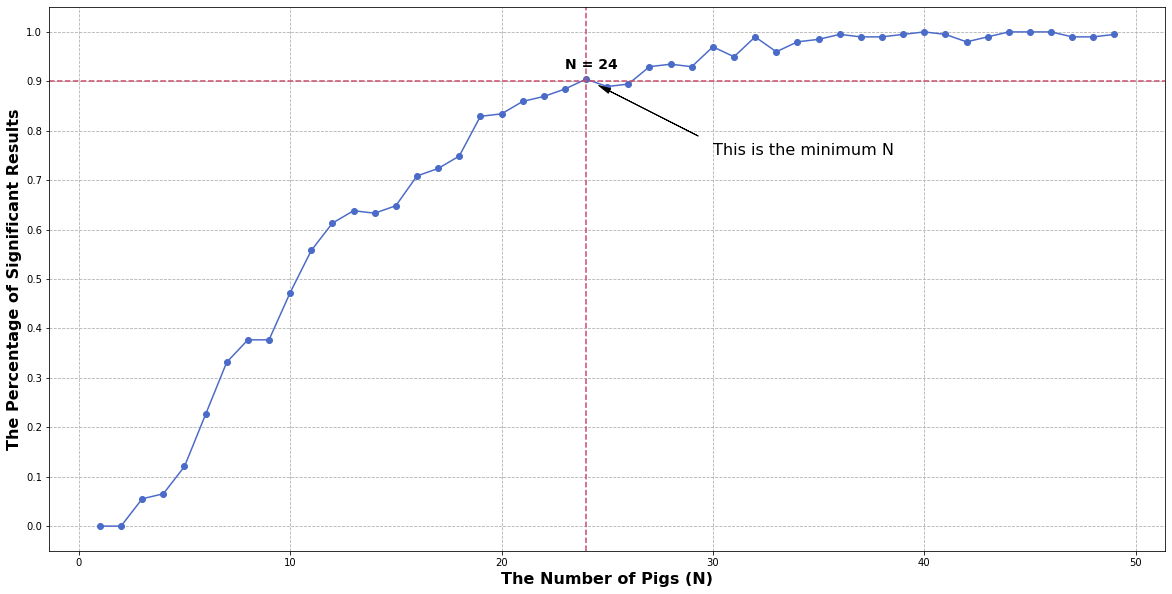

In [15]:
#Plotting the data

threshold = 0.9

plt.figure(figsize=(20, 10))

arrow_properties = dict(facecolor="black", width=0.01,headwidth=5, shrink=0.1)

plt.plot(N_values,result, marker = '.',markersize = 12,color = '#4b6bc8')

for a,b in zip(N_values, result): 
    if a == N_min[0] :
        plt.text(a - 1, b + 0.02, 'N = '+str(a), fontsize = 14, fontweight = 'bold',  horizontalalignment='left')

plt.grid(linestyle= '--')
plt.xlabel("The Number of Pigs (N)", fontsize = 16 ,fontweight = 'bold')
plt.ylabel("The Percentage of Significant Results", fontsize = 16, fontweight = 'bold')

plt.axhline(threshold, color='#c84b6b', lineStyle='--')
plt.axvline(N_min[0], color='#c84b6b', lineStyle='--')
plt.yticks([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
# plt.xticks(np.aranrge(1,50,5))

# arrow_properties = dict(facecolor="black", width=0.01,headwidth=5, shrink=0.1)
plt.annotate('This is the minimum N',xy = (N_min[0],result[N_min[0]-1]), xytext = (30,0.75),arrowprops=arrow_properties, fontsize = 16)

plt.show()